In [37]:
import numpy as np
import geopandas as gpd
from geopandas.tools import sjoin
from matplotlib import pyplot as plt
import pandas as pd
from shapely.geometry import Point
import shapefile as shp
import matplotlib.pyplot as plt
# import pyproj
# pyproj.Proj("+init=epsg:102739")

### 1. shape file & prepped data

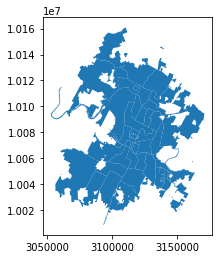

In [38]:
APD_shp_gdf = gpd.GeoDataFrame.from_file('./data/Dept_37-00027/37-00027_Shapefiles/new/APD_DIST.shp')
APD_shp_gdf.plot();
APD_prepped_df = pd.read_csv("./data/Dept_37-00027/37-00027_UOF-P_2014-2016_prepped.csv").iloc[1:].reset_index(drop=True)

In [39]:
APD_shp_gdf.crs

{'init': 'epsg:102739'}

In [40]:
APD_shp_gdf.head(5)

,NAME,SORTORDER,BATID,JURIID,COLOR,CODE,EXTERNALKE,BATTALIONC,DISTRICT,SECTOR,INPUT_DATE,MODIFIED_D,INPUT_BY,MODIFIED_B,BUREAU,PATROL_ARE,AREACOMMAN,SHAPE_AREA,SHAPE_LEN,geometry
0,CHARLIE 4,1.0,400.0,11.0,16744576.0,1282,1282,CHAR,CHARLIE 4,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071,"POLYGON ((3160030.801874995 10110945.26125, 31..."
1,GEORGE 1,1.0,194.0,15.0,16744576.0,1298,1298,G1,GEORGE 1,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,2.790690e+07,23590.887752,"POLYGON ((3117569.753749996 10072205.20874999,..."
2,GEORGE 2,1.0,194.0,15.0,16776960.0,1297,1297,G1,GEORGE 2,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,9.667245e+06,19773.819675,"POLYGON ((3117394.076875001 10072195.676875, 3..."
3,IDA 1,1.0,215.0,60.0,16744576.0,1307,1307,I1,IDA 1,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,1.054603e+08,48972.544807,"POLYGON ((3138058.366874993 10093095.421875, 3..."
4,IDA 2,1.0,215.0,60.0,16711680.0,1304,1304,I1,IDA 2,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,6.245594e+07,38742.443899,"POLYGON ((3132516.318124995 10096385.60124999,..."


In [41]:
APD_prepped_df.head(5)
APD_prepped_df.describe()

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,Unnamed: 19,OFFICER_YEARS_ON_FORCE,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE
count,9482,9482,9482,9465,9479,9479,9437,9158,9140,2887,...,9466,9482,9459,9459,6516,9482,9482,9482,2160,2160
unique,9482,4910,1077,12,7,8,5410,2,5,23,...,194,33,3106,3053,10,3146,1,1,880,880
top,159024,2014760078,1/1/2016,GE,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,459355965: 20153601532,M,Hispanic,ARRESTED,...,GEORGE 600 REG I PATROL,2,3115491,10070521,9,400 E 6TH ST,Austin,TX,30.267346,-97.740288
freq,1,12,36,2536,5884,5987,9,7485,3233,2066,...,250,1405,340,340,2125,182,9482,9482,47,47



### There are many lines without Latitude / Longtitude, we just drop those lines first for simplicity


In [42]:
APD_prepped_latlon_exists_ind = APD_prepped_df[['LOCATION_LATITUDE','LOCATION_LONGITUDE']].dropna().index

In [43]:
APD_prepped_df = APD_prepped_df.iloc[APD_prepped_latlon_exists_ind].reset_index(drop=True)

In [44]:
APD_prepped_df.describe()

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,Unnamed: 19,OFFICER_YEARS_ON_FORCE,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE
count,2160,2160,2160,2160,2160,2160,2160,2134,2130,2160,...,2160,2160,2160,2160,0.0,2160,2160,2160,2160,2160
unique,2160,1140,342,11,6,7,1231,2,4,22,...,133,31,880,879,0.0,890,1,1,880,880
top,145689,2014760078,5/25/2014,GE,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,187114773: 20141450312,M,Hispanic,ARRESTED,...,GEORGE 400 REG I PATROL,2,3115155,10070604,NaN,300 E 6TH ST,Austin,TX,30.267346,-97.740288
freq,1,12,25,395,1513,1400,8,1760,774,1513,...,95,333,47,47,NaN,47,2160,2160,47,47


In [45]:
APD_prepped_df.head(5)

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,Unnamed: 19,OFFICER_YEARS_ON_FORCE,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE
0,143002,2014170002,1/17/2014,GE,OTHER,NECESSARY TO EFFECT ARREST / DETENTION,5041390: 2014170002,M,Hispanic,ARRESTED,...,GEORGE 400 REG I PATROL,4,3115601,10070275,NaN,417 E 6TH ST,Austin,TX,30.2669,-97.738652
1,149691,20141981994,7/18/2014,FR,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,302385019: 20141981994,M,Hispanic,ARRESTED,...,FRANK 500 REG IV PATROL,8,3115061,10044935,NaN,5000 TABLE TOP TRL,Austin,TX,30.19693,-97.742096
2,153115,20143060391,11/2/2014,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459210821: 20143060391,M,Hispanic,ARRESTED,...,GEORGE DISTRICT REPS REG I PARTOL,10,3115155,10070604,NaN,300 E 6TH ST,Austin,TX,30.267346,-97.740288
3,149599,20141931963,7/12/2014,CH,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,10627710: 20141931963,F,Black,VICTIM/ARRE,...,CHARLIE 700 REG III PATROL,2,3137140,10085508,NaN,6409 SPRINGDALE RD,Austin,TX,30.307201,-97.669664
4,152713,20142921903,10/20/2014,AD,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,459015691: 20142921903,M,White,ARRESTED,...,ADAM 700 REG II PATROL,6,3129179,10123478,NaN,12430 METRIC BLVD,Austin,TX,30.411555,-97.69205


#### convert Latitude and Longtitude to float type

In [46]:
APD_prepped_df['LOCATION_LATITUDE'] = (APD_prepped_df['LOCATION_LATITUDE'].astype('float'))
APD_prepped_df['LOCATION_LONGITUDE'] = (APD_prepped_df['LOCATION_LONGITUDE'].astype('float'))

### We have to convert points in prepped_df into prepped_gdf using point(Lon, Lat)

In [47]:

# important to check if order in Shapefile is Point(Longitude,Latitude)
APD_prepped_df['geometry'] = (APD_prepped_df.apply(lambda x: Point(x['LOCATION_LONGITUDE'],x['LOCATION_LATITUDE']), axis=1))
APD_prepped_gdf = gpd.GeoDataFrame(APD_prepped_df, geometry='geometry')
APD_prepped_gdf.crs = {'init' :'epsg:4326'}



In [48]:
APD_shp_gdf.head(5)

,NAME,SORTORDER,BATID,JURIID,COLOR,CODE,EXTERNALKE,BATTALIONC,DISTRICT,SECTOR,INPUT_DATE,MODIFIED_D,INPUT_BY,MODIFIED_B,BUREAU,PATROL_ARE,AREACOMMAN,SHAPE_AREA,SHAPE_LEN,geometry
0,CHARLIE 4,1.0,400.0,11.0,16744576.0,1282,1282,CHAR,CHARLIE 4,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071,"POLYGON ((3160030.801874995 10110945.26125, 31..."
1,GEORGE 1,1.0,194.0,15.0,16744576.0,1298,1298,G1,GEORGE 1,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,2.790690e+07,23590.887752,"POLYGON ((3117569.753749996 10072205.20874999,..."
2,GEORGE 2,1.0,194.0,15.0,16776960.0,1297,1297,G1,GEORGE 2,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,9.667245e+06,19773.819675,"POLYGON ((3117394.076875001 10072195.676875, 3..."
3,IDA 1,1.0,215.0,60.0,16744576.0,1307,1307,I1,IDA 1,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,1.054603e+08,48972.544807,"POLYGON ((3138058.366874993 10093095.421875, 3..."
4,IDA 2,1.0,215.0,60.0,16711680.0,1304,1304,I1,IDA 2,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,6.245594e+07,38742.443899,"POLYGON ((3132516.318124995 10096385.60124999,..."


#### The important .proj file is lost, so we init our own projection

In [49]:
APD_shp_gdf.crs = {'init' :'epsg:4326'}
APD_shp_gdf.crs

{'init': 'epsg:4326'}

In [50]:
APD_shp_gdf.crs = {'init' :'esri:102739'}
APD_shp_gdf = APD_shp_gdf.to_crs(epsg='4326')

In [51]:
APD_shp_gdf.head(5)

,NAME,SORTORDER,BATID,JURIID,COLOR,CODE,EXTERNALKE,BATTALIONC,DISTRICT,SECTOR,INPUT_DATE,MODIFIED_D,INPUT_BY,MODIFIED_B,BUREAU,PATROL_ARE,AREACOMMAN,SHAPE_AREA,SHAPE_LEN,geometry
0,CHARLIE 4,1.0,400.0,11.0,16744576.0,1282,1282,CHAR,CHARLIE 4,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071,POLYGON ((-97.59489290692989 30.37553595219778...
1,GEORGE 1,1.0,194.0,15.0,16744576.0,1298,1298,G1,GEORGE 1,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,2.790690e+07,23590.887752,POLYGON ((-97.73238075061245 30.27184843482282...
2,GEORGE 2,1.0,194.0,15.0,16776960.0,1297,1297,G1,GEORGE 2,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,9.667245e+06,19773.819675,POLYGON ((-97.73293781244578 30.27183352500002...
3,IDA 1,1.0,215.0,60.0,16744576.0,1307,1307,I1,IDA 1,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,1.054603e+08,48972.544807,"POLYGON ((-97.6659090431541 30.32793819394199,..."
4,IDA 2,1.0,215.0,60.0,16711680.0,1304,1304,I1,IDA 2,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,6.245594e+07,38742.443899,POLYGON ((-97.68322191035148 30.33734648658405...


In [52]:
APD_shp_gdf.head(5)

,NAME,SORTORDER,BATID,JURIID,COLOR,CODE,EXTERNALKE,BATTALIONC,DISTRICT,SECTOR,INPUT_DATE,MODIFIED_D,INPUT_BY,MODIFIED_B,BUREAU,PATROL_ARE,AREACOMMAN,SHAPE_AREA,SHAPE_LEN,geometry
0,CHARLIE 4,1.0,400.0,11.0,16744576.0,1282,1282,CHAR,CHARLIE 4,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071,POLYGON ((-97.59489290692989 30.37553595219778...
1,GEORGE 1,1.0,194.0,15.0,16744576.0,1298,1298,G1,GEORGE 1,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,2.790690e+07,23590.887752,POLYGON ((-97.73238075061245 30.27184843482282...
2,GEORGE 2,1.0,194.0,15.0,16776960.0,1297,1297,G1,GEORGE 2,GEORGE,2014-12-22,None,bmartinlimuel,None,NORTH,DTAC,512-974-5203,9.667245e+06,19773.819675,POLYGON ((-97.73293781244578 30.27183352500002...
3,IDA 1,1.0,215.0,60.0,16744576.0,1307,1307,I1,IDA 1,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,1.054603e+08,48972.544807,"POLYGON ((-97.6659090431541 30.32793819394199,..."
4,IDA 2,1.0,215.0,60.0,16711680.0,1304,1304,I1,IDA 2,IDA,2014-12-22,None,bmartinlimuel,None,CENTRAL,NORTHCENTRAL,512-974-5203,6.245594e+07,38742.443899,POLYGON ((-97.68322191035148 30.33734648658405...


In [53]:
APD_prepped_gdf.head(5)

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,OFFICER_YEARS_ON_FORCE,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE,geometry
0,143002,2014170002,1/17/2014,GE,OTHER,NECESSARY TO EFFECT ARREST / DETENTION,5041390: 2014170002,M,Hispanic,ARRESTED,...,4,3115601,10070275,NaN,417 E 6TH ST,Austin,TX,30.266900,-97.738652,POINT (-97.738652 30.2669)
1,149691,20141981994,7/18/2014,FR,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,302385019: 20141981994,M,Hispanic,ARRESTED,...,8,3115061,10044935,NaN,5000 TABLE TOP TRL,Austin,TX,30.196930,-97.742096,POINT (-97.742096 30.19693)
2,153115,20143060391,11/2/2014,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459210821: 20143060391,M,Hispanic,ARRESTED,...,10,3115155,10070604,NaN,300 E 6TH ST,Austin,TX,30.267346,-97.740288,POINT (-97.74028800000001 30.267346)
3,149599,20141931963,7/12/2014,CH,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,10627710: 20141931963,F,Black,VICTIM/ARRE,...,2,3137140,10085508,NaN,6409 SPRINGDALE RD,Austin,TX,30.307201,-97.669664,POINT (-97.669664 30.307201)
4,152713,20142921903,10/20/2014,AD,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,459015691: 20142921903,M,White,ARRESTED,...,6,3129179,10123478,NaN,12430 METRIC BLVD,Austin,TX,30.411555,-97.692050,POINT (-97.69204999999999 30.411555)


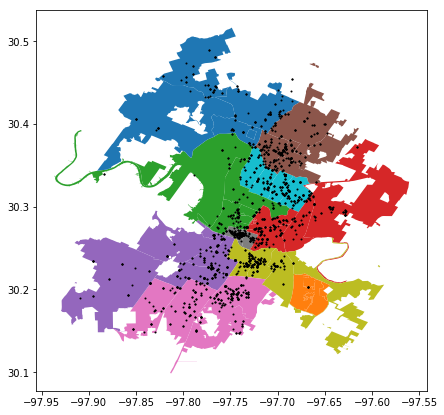

In [54]:
fig1,ax1 = plt.subplots()
APD_shp_gdf.plot(ax=ax1,column="SECTOR")
APD_prepped_gdf.plot(ax=ax1,marker='.',color='k',markersize=4)
fig1.set_size_inches(7,7)

### 2. census data

In [55]:
AACS_poverty_df = pd.read_csv("./data/AACS_p.csv").iloc[1:].reset_index(drop=True)

In [56]:
AACS_poverty_df.head(5)

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC01_EST_VC03,...,HC02_EST_VC78,HC02_MOE_VC78,HC03_EST_VC78,HC03_MOE_VC78,HC01_EST_VC79,HC01_MOE_VC79,HC02_EST_VC79,HC02_MOE_VC79,HC03_EST_VC79,HC03_MOE_VC79
0,1400000US48453000101,48453000101,"Census Tract 1.01, Travis County, Texas",4270,276,270,104,6.3,2.4,821,...,127,66,30.6,16.4,420,99,117,65,27.9,14.2
1,1400000US48453000102,48453000102,"Census Tract 1.02, Travis County, Texas",2570,171,81,74,3.2,2.9,571,...,4,5,2.5,3.2,255,72,43,32,16.9,11.4
2,1400000US48453000203,48453000203,"Census Tract 2.03, Travis County, Texas",1258,174,423,142,33.6,9.1,49,...,169,73,49.9,13.2,207,96,160,90,77.3,15.7
3,1400000US48453000204,48453000204,"Census Tract 2.04, Travis County, Texas",3042,199,589,171,19.4,5.7,426,...,341,137,55.8,14.7,244,91,168,80,68.9,17.5
4,1400000US48453000205,48453000205,"Census Tract 2.05, Travis County, Texas",4227,425,547,325,12.9,6.7,478,...,302,221,41.4,21.6,311,163,205,141,65.9,28.9


In [58]:
ABTACS_gdf = gpd.read_file("./data/AACS/cb_2017_48_tract_500k.shp")

In [59]:
ABTACS_gdf.head(5) 

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,48,001,950902,1400000US48001950902,48001950902,9509.02,CT,441365958,4947660,"POLYGON ((-95.705011 31.840815, -95.7056039999..."
1,48,005,000200,1400000US48005000200,48005000200,2,CT,125709530,4356605,"POLYGON ((-94.73299299999999 31.385078, -94.73..."
2,48,005,000700,1400000US48005000700,48005000700,7,CT,2876878,0,"POLYGON ((-94.73496999999999 31.327901, -94.73..."
3,48,005,001200,1400000US48005001200,48005001200,12,CT,399114984,98858732,"POLYGON ((-94.52616999999999 31.212772, -94.50..."
4,48,009,020200,1400000US48009020200,48009020200,202,CT,1318291865,40681909,"POLYGON ((-98.95382499999999 33.49637, -98.953..."


#### Rename the first two columns of census file to match the census shape file (for the merge)

In [60]:
# ABTACS_poverty_df.rename(columns = {"GEO.id2":"GEOID"})

In [88]:
ACS_p_merge_gdf = ABTACS_gdf.merge(AACS_poverty_df, left_on = "GEOID", right_on = "GEO.id2")

In [89]:
ACS_p_merge_gdf.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,HC02_EST_VC78,HC02_MOE_VC78,HC03_EST_VC78,HC03_MOE_VC78,HC01_EST_VC79,HC01_MOE_VC79,HC02_EST_VC79,HC02_MOE_VC79,HC03_EST_VC79,HC03_MOE_VC79
0,48,453,000204,1400000US48453000204,48453000204,2.04,CT,1822932,0,"POLYGON ((-97.74882099999999 30.304717, -97.74...",...,341,137,55.8,14.7,244,91,168,80,68.9,17.5
1,48,453,001000,1400000US48453001000,48453001000,10,CT,1981569,355817,"POLYGON ((-97.737174 30.259136, -97.736553 30....",...,81,58,31.2,18.4,315,85,191,74,60.6,14.7
2,48,453,001307,1400000US48453001307,48453001307,13.07,CT,1793885,0,"POLYGON ((-97.77566 30.230012, -97.774424 30.2...",...,117,44,35.7,10.6,254,121,178,96,70.1,15.3
3,48,453,001504,1400000US48453001504,48453001504,15.04,CT,2633764,0,"POLYGON ((-97.736611 30.346735, -97.7357799999...",...,93,69,21.7,15.9,191,104,72,78,37.7,28.0
4,48,453,001748,1400000US48453001748,48453001748,17.48,CT,5355764,0,"POLYGON ((-97.857782 30.171094, -97.856437 30....",...,96,90,17.9,15.5,255,155,144,132,56.5,28.1


In [90]:
ACS_p_merge_gdf.shape

(218, 379)

In [92]:
ACS_p_merge_gdf =ACS_p_merge_gdf.to_crs(epsg='4326')

In [94]:
ACS_p_merge_gdf.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,HC02_EST_VC78,HC02_MOE_VC78,HC03_EST_VC78,HC03_MOE_VC78,HC01_EST_VC79,HC01_MOE_VC79,HC02_EST_VC79,HC02_MOE_VC79,HC03_EST_VC79,HC03_MOE_VC79
0,48,453,000204,1400000US48453000204,48453000204,2.04,CT,1822932,0,"POLYGON ((-97.74882099999999 30.304717, -97.74...",...,341,137,55.8,14.7,244,91,168,80,68.9,17.5
1,48,453,001000,1400000US48453001000,48453001000,10,CT,1981569,355817,"POLYGON ((-97.737174 30.259136, -97.736553 30....",...,81,58,31.2,18.4,315,85,191,74,60.6,14.7
2,48,453,001307,1400000US48453001307,48453001307,13.07,CT,1793885,0,"POLYGON ((-97.77566 30.230012, -97.774424 30.2...",...,117,44,35.7,10.6,254,121,178,96,70.1,15.3
3,48,453,001504,1400000US48453001504,48453001504,15.04,CT,2633764,0,"POLYGON ((-97.736611 30.346735, -97.7357799999...",...,93,69,21.7,15.9,191,104,72,78,37.7,28.0
4,48,453,001748,1400000US48453001748,48453001748,17.48,CT,5355764,0,"POLYGON ((-97.857782 30.171094, -97.856437 30....",...,96,90,17.9,15.5,255,155,144,132,56.5,28.1


### combine the police shape file and prepped file with census map

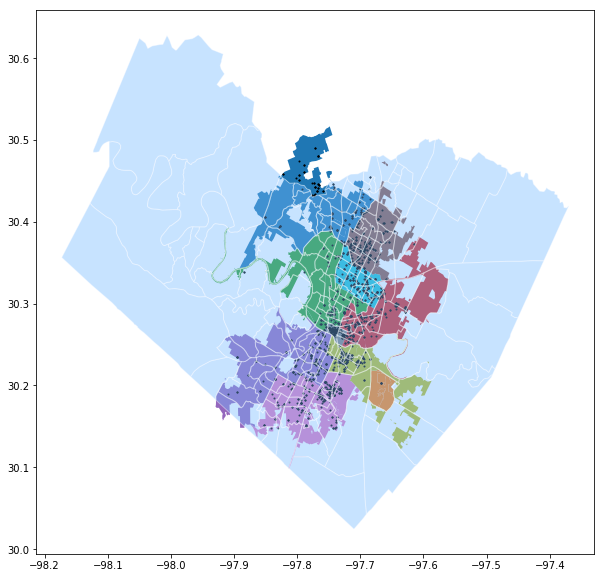

In [95]:
fig2,ax2 = plt.subplots()
APD_shp_gdf.plot(ax=ax2,column="SECTOR")
APD_prepped_gdf.plot(ax=ax2,marker='.',color='k',markersize=4)
ACS_p_merge_gdf.plot(ax=ax2,color='#74b9ff',alpha=.4,edgecolor='white')
fig2.set_size_inches(10,10)

In [81]:
test_sjoin = gpd.sjoin(APD_prepped_gdf, APD_shp_gdf.iloc[0:1])

In [82]:
test_sjoin.head(5)

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,SECTOR,INPUT_DATE,MODIFIED_D,INPUT_BY,MODIFIED_B,BUREAU,PATROL_ARE,AREACOMMAN,SHAPE_AREA,SHAPE_LEN
50,153899,20143340126,11/30/2014,CH,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,188941358: 20143340126,F,Black,COMMITTED,...,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071
51,153900,20143340126,11/30/2014,CH,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,188941358: 20143340126,F,Black,COMMITTED,...,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071
69,147980,20141510640,5/31/2014,CH,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,27001210: 20141510640,M,Black,ARRESTED,...,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071
104,153829,20143340677,11/30/2014,CH,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,322765442: 20143340677,M,Black,SUSPECT,...,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071
280,150381,20142200746,8/8/2014,CH,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,180690498: 20142200746,F,Black,ARRESTED,...,CHARLIE,2014-12-22,None,bmartinlimuel,None,CENTRAL,CENTRALEAST,512-974-5900,6.657440e+08,387953.791071


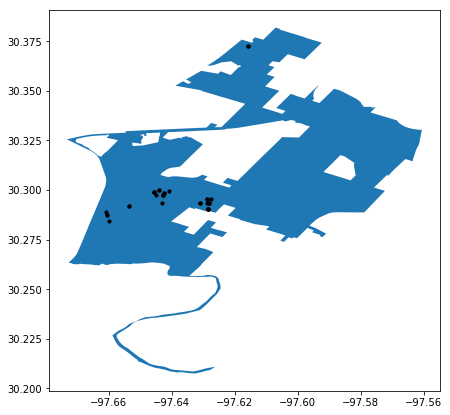

In [84]:
# Plot the results
fig3,ax3 = plt.subplots()
APD_shp_gdf.iloc[0:1].plot(ax=ax3)
test_sjoin.plot(ax=ax3,marker='o',color='k',markersize=10)
fig3.set_size_inches(7,7)

### 3. Number of crimes and poverty level 
Let's first find out relationship between numbers of crimes and poverty level in districts of this area.
How could we get information about poverty?
First, let's get a quick view on ACS's poverty survey in this area, again.

In [97]:
ACS_p_merge_gdf.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,HC02_EST_VC78,HC02_MOE_VC78,HC03_EST_VC78,HC03_MOE_VC78,HC01_EST_VC79,HC01_MOE_VC79,HC02_EST_VC79,HC02_MOE_VC79,HC03_EST_VC79,HC03_MOE_VC79
0,48,453,000204,1400000US48453000204,48453000204,2.04,CT,1822932,0,"POLYGON ((-97.74882099999999 30.304717, -97.74...",...,341,137,55.8,14.7,244,91,168,80,68.9,17.5
1,48,453,001000,1400000US48453001000,48453001000,10,CT,1981569,355817,"POLYGON ((-97.737174 30.259136, -97.736553 30....",...,81,58,31.2,18.4,315,85,191,74,60.6,14.7
2,48,453,001307,1400000US48453001307,48453001307,13.07,CT,1793885,0,"POLYGON ((-97.77566 30.230012, -97.774424 30.2...",...,117,44,35.7,10.6,254,121,178,96,70.1,15.3
3,48,453,001504,1400000US48453001504,48453001504,15.04,CT,2633764,0,"POLYGON ((-97.736611 30.346735, -97.7357799999...",...,93,69,21.7,15.9,191,104,72,78,37.7,28.0
4,48,453,001748,1400000US48453001748,48453001748,17.48,CT,5355764,0,"POLYGON ((-97.857782 30.171094, -97.856437 30....",...,96,90,17.9,15.5,255,155,144,132,56.5,28.1


We can see from the first 5 lines that, most of the features are coded into some combination of letters and numbers. 
Where could we find their meaning? 
Let's check anther file named: AACS_p_metadata.csv (Files are renamed by myself. However, it is easy to get their meaning from their names).

In [106]:
AACS_poverty_para_df = pd.read_csv("./data/AACS_p_metadata.csv")

In [108]:
AACS_poverty_para_df.head(10)

,GEO.id,Id
0,GEO.id2,Id2
1,GEO.display-label,Geography
2,HC01_EST_VC01,Total; Estimate; Population for whom poverty s...
3,HC01_MOE_VC01,Total; Margin of Error; Population for whom po...
4,HC02_EST_VC01,Below poverty level; Estimate; Population for ...
5,HC02_MOE_VC01,Below poverty level; Margin of Error; Populati...
6,HC03_EST_VC01,Percent below poverty level; Estimate; Populat...
7,HC03_MOE_VC01,Percent below poverty level; Margin of Error; ...
8,HC01_EST_VC03,Total; Estimate; AGE - Under 18 years
9,HC01_MOE_VC03,Total; Margin of Error; AGE - Under 18 years


There are many interesting population features that may be related to crime rate, for example, percent of residents below poverty level, unemployment rate, population that have bachelor or higher degree, unemployment rate for people with bachelor or higher degree...

Let's first try these two: crime rate and percent of residents below poverty level.
How do we get crime rate in the census areas?

We first need to merge these two dataframes. Let's see these two first.
The only way to link these two table is the "geometry" feature, which means we could identify whether the crime point is in the census or not. 
=0. test whether .intersects work or not
=1. We could add a new column for "prepped" dataset to record the "GEOID" of crime.

In [110]:
APD_prepped_gdf.head(5)

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,OFFICER_YEARS_ON_FORCE,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE,geometry
index_left,,,,,,,,,,,,,,,,,,,,,
0,143002,2014170002,1/17/2014,GE,OTHER,NECESSARY TO EFFECT ARREST / DETENTION,5041390: 2014170002,M,Hispanic,ARRESTED,...,4,3115601,10070275,NaN,417 E 6TH ST,Austin,TX,30.266900,-97.738652,POINT (-97.738652 30.2669)
1,149691,20141981994,7/18/2014,FR,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,302385019: 20141981994,M,Hispanic,ARRESTED,...,8,3115061,10044935,NaN,5000 TABLE TOP TRL,Austin,TX,30.196930,-97.742096,POINT (-97.742096 30.19693)
2,153115,20143060391,11/2/2014,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459210821: 20143060391,M,Hispanic,ARRESTED,...,10,3115155,10070604,NaN,300 E 6TH ST,Austin,TX,30.267346,-97.740288,POINT (-97.74028800000001 30.267346)
3,149599,20141931963,7/12/2014,CH,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,10627710: 20141931963,F,Black,VICTIM/ARRE,...,2,3137140,10085508,NaN,6409 SPRINGDALE RD,Austin,TX,30.307201,-97.669664,POINT (-97.669664 30.307201)
4,152713,20142921903,10/20/2014,AD,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,459015691: 20142921903,M,White,ARRESTED,...,6,3129179,10123478,NaN,12430 METRIC BLVD,Austin,TX,30.411555,-97.692050,POINT (-97.69204999999999 30.411555)


In [112]:
ACS_p_merge_gdf.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,HC02_EST_VC78,HC02_MOE_VC78,HC03_EST_VC78,HC03_MOE_VC78,HC01_EST_VC79,HC01_MOE_VC79,HC02_EST_VC79,HC02_MOE_VC79,HC03_EST_VC79,HC03_MOE_VC79
0,48,453,000204,1400000US48453000204,48453000204,2.04,CT,1822932,0,"POLYGON ((-97.74882099999999 30.304717, -97.74...",...,341,137,55.8,14.7,244,91,168,80,68.9,17.5
1,48,453,001000,1400000US48453001000,48453001000,10,CT,1981569,355817,"POLYGON ((-97.737174 30.259136, -97.736553 30....",...,81,58,31.2,18.4,315,85,191,74,60.6,14.7
2,48,453,001307,1400000US48453001307,48453001307,13.07,CT,1793885,0,"POLYGON ((-97.77566 30.230012, -97.774424 30.2...",...,117,44,35.7,10.6,254,121,178,96,70.1,15.3
3,48,453,001504,1400000US48453001504,48453001504,15.04,CT,2633764,0,"POLYGON ((-97.736611 30.346735, -97.7357799999...",...,93,69,21.7,15.9,191,104,72,78,37.7,28.0
4,48,453,001748,1400000US48453001748,48453001748,17.48,CT,5355764,0,"POLYGON ((-97.857782 30.171094, -97.856437 30....",...,96,90,17.9,15.5,255,155,144,132,56.5,28.1


#### Test "intersects" in geopandas:
1. use the first row in the prepped dataset (first crime point)
2. use for-loop to check each census area. If intersects, then set GEOID of the crime point as the same
3. plot that specific area and the point, we can see the point is indeed located in that area.

In [143]:
N_census = len(ACS_p_merge_gdf.index)
N_crime = len(APD_prepped_gdf.index)
GEOID_0 = ""
POINT = APD_prepped_gdf.iloc[0]["geometry"]

In [154]:
N_crime

2160

In [155]:
N_census

218

In [119]:
for i in range(N_census):
    polygon = ACS_p_merge_gdf.iloc[i]["geometry"]
    if polygon.intersects(POINT):
        GEOID_0 = ACS_p_merge_gdf.iloc[i]["GEOID"]

In [120]:
GEOID_0

'48453001100'

In [122]:
ACS_p_merge_gdf[ACS_p_merge_gdf["GEOID"] == "48453001100"]

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,HC02_EST_VC78,HC02_MOE_VC78,HC03_EST_VC78,HC03_MOE_VC78,HC01_EST_VC79,HC01_MOE_VC79,HC02_EST_VC79,HC02_MOE_VC79,HC03_EST_VC79,HC03_MOE_VC79
56,48,453,001100,1400000US48453001100,48453001100,11,CT,2437657,239536,"POLYGON ((-97.75089899999999 30.271028, -97.75...",...,116,98,18.4,13.3,590,175,409,143,69.3,14.6


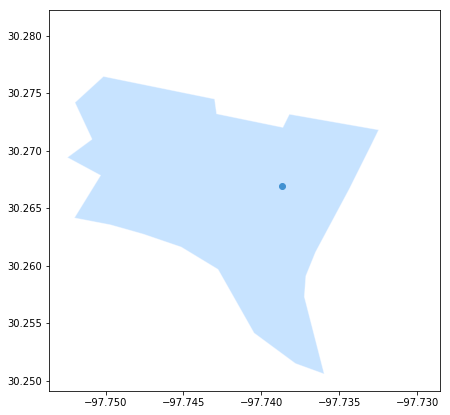

In [141]:
fig4,ax4 = plt.subplots()
APD_prepped_gdf.loc[[0],'geometry'].plot(ax=ax4)
ACS_p_merge_gdf[ACS_p_merge_gdf["GEOID"] == "48453001100"].plot(ax=ax4,color='#74b9ff',alpha=.4,edgecolor='white')
fig4.set_size_inches(7,7)

#### We can now use a list to record each point's GEOID

In [164]:
geoId_list = []

In [165]:
for p in range(N_crime):
    point = APD_prepped_gdf.iloc[p]["geometry"]
    geoId = ""
    for i in range(N_census):
        polygon = ACS_p_merge_gdf.iloc[i]["geometry"]
        if polygon.intersects(point):
            geoId = ACS_p_merge_gdf.iloc[i]["GEOID"]
    geoId_list.append(geoId)

In [166]:
len(geoId_list)

2160

In [167]:
geoId_df = pd.DataFrame(geoId_list)

In [168]:
geoId_df.head(5)

,0
0,48453001100
1,48453002413
2,48453001100
3,48453002108
4,48453001826


In [169]:
APD_prepped_gdf["GEOID"] = gpd.GeoDataFrame(geoId_df)

In [170]:
APD_prepped_gdf.head(5)

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE,geometry,GEOID
index_left,,,,,,,,,,,,,,,,,,,,,
0,143002,2014170002,1/17/2014,GE,OTHER,NECESSARY TO EFFECT ARREST / DETENTION,5041390: 2014170002,M,Hispanic,ARRESTED,...,3115601,10070275,NaN,417 E 6TH ST,Austin,TX,30.266900,-97.738652,POINT (-97.738652 30.2669),48453001100
1,149691,20141981994,7/18/2014,FR,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,302385019: 20141981994,M,Hispanic,ARRESTED,...,3115061,10044935,NaN,5000 TABLE TOP TRL,Austin,TX,30.196930,-97.742096,POINT (-97.742096 30.19693),48453002413
2,153115,20143060391,11/2/2014,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459210821: 20143060391,M,Hispanic,ARRESTED,...,3115155,10070604,NaN,300 E 6TH ST,Austin,TX,30.267346,-97.740288,POINT (-97.74028800000001 30.267346),48453001100
3,149599,20141931963,7/12/2014,CH,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,10627710: 20141931963,F,Black,VICTIM/ARRE,...,3137140,10085508,NaN,6409 SPRINGDALE RD,Austin,TX,30.307201,-97.669664,POINT (-97.669664 30.307201),48453002108
4,152713,20142921903,10/20/2014,AD,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,459015691: 20142921903,M,White,ARRESTED,...,3129179,10123478,NaN,12430 METRIC BLVD,Austin,TX,30.411555,-97.692050,POINT (-97.69204999999999 30.411555),48453001826


#### Information about the new "GEOID" column

In [175]:
APD_prepped_gdf["GEOID"].describe()

count            2160
unique            148
top       48453001100
freq              363
Name: GEOID, dtype: object

#### Let's have a look at all the points inside this area "48453001100"

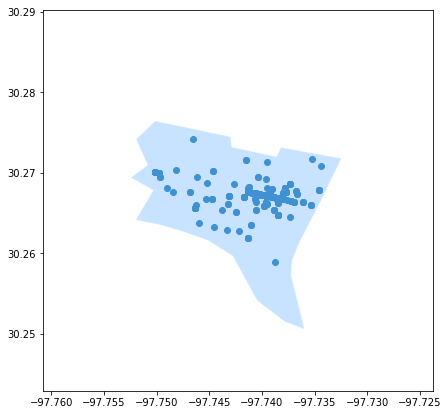

In [173]:
fig5,ax5 = plt.subplots()
APD_prepped_gdf[APD_prepped_gdf["GEOID"] == "48453001100"].plot(ax=ax5)
ACS_p_merge_gdf[ACS_p_merge_gdf["GEOID"] == "48453001100"].plot(ax=ax5,color='#74b9ff',alpha=.4,edgecolor='white')
fig5.set_size_inches(7,7)

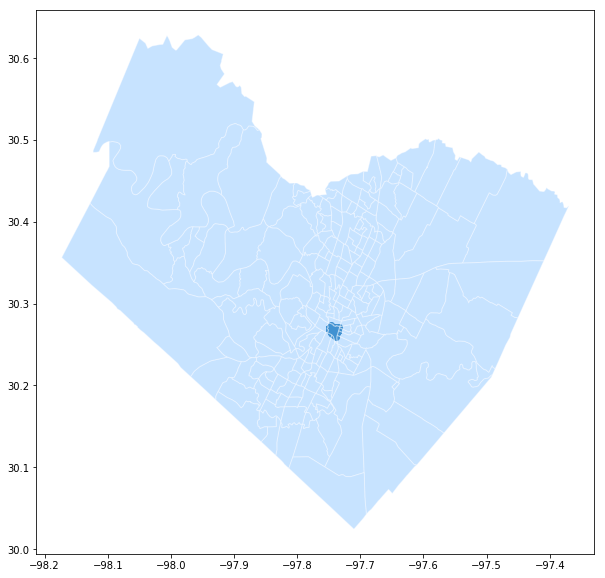

In [181]:
fig6,ax6 = plt.subplots()
APD_prepped_gdf[APD_prepped_gdf["GEOID"] == "48453001100"].plot(ax=ax6)
ACS_p_merge_gdf.plot(ax=ax6,color='#74b9ff',alpha=.4,edgecolor='white')
fig6.set_size_inches(10,10)

#### We can tell from the plot of all the census district that, those crime points are indeed inside the "48453001100" area

In [182]:
APD_prepped_gdf.head(5)

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE,geometry,GEOID
index_left,,,,,,,,,,,,,,,,,,,,,
0,143002,2014170002,1/17/2014,GE,OTHER,NECESSARY TO EFFECT ARREST / DETENTION,5041390: 2014170002,M,Hispanic,ARRESTED,...,3115601,10070275,NaN,417 E 6TH ST,Austin,TX,30.266900,-97.738652,POINT (-97.738652 30.2669),48453001100
1,149691,20141981994,7/18/2014,FR,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,302385019: 20141981994,M,Hispanic,ARRESTED,...,3115061,10044935,NaN,5000 TABLE TOP TRL,Austin,TX,30.196930,-97.742096,POINT (-97.742096 30.19693),48453002413
2,153115,20143060391,11/2/2014,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459210821: 20143060391,M,Hispanic,ARRESTED,...,3115155,10070604,NaN,300 E 6TH ST,Austin,TX,30.267346,-97.740288,POINT (-97.74028800000001 30.267346),48453001100
3,149599,20141931963,7/12/2014,CH,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,10627710: 20141931963,F,Black,VICTIM/ARRE,...,3137140,10085508,NaN,6409 SPRINGDALE RD,Austin,TX,30.307201,-97.669664,POINT (-97.669664 30.307201),48453002108
4,152713,20142921903,10/20/2014,AD,DISPATCHED CALL,NECESSARY TO EFFECT ARREST / DETENTION,459015691: 20142921903,M,White,ARRESTED,...,3129179,10123478,NaN,12430 METRIC BLVD,Austin,TX,30.411555,-97.692050,POINT (-97.69204999999999 30.411555),48453001826


## Since now we have a new column for the crime points, we can connect the crime points with the ACS survey data.